In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

> **Name: Alia AlGhamdi**

# Transfer functions

In [2]:
def purelin(x):
    '''
       This function takes the value of x as an input, 
       and returns the linear value of that number (same value).
    '''
    return x

In [3]:
def poslin(x):
    '''
       This function takes the value of x as an input.
       - returns: 0 if x is less than 0, x otherwise.  
    '''
    if x<0:
        return 0
    return x

# Q1
**Develop a feedforward layer. The feedforward layer is similar to the multiple input neuron you implemented in the last lab. It takes as an input a column vector p, weight matrix w, bias vector b and produces a summation output n which when passed to the transfer function (purelin) generates the output a.**           
 
**Create a function titled feedforwardlayer and pass the parameters i.e. values of ‘p’, ‘w’, ‘b’ and return the 
output ‘a1’ from that function.**

In [4]:
def feedForwardLayer(p,w,b):
    a= np.dot(w,p)+b
    return purelin(a)

In [5]:
p =np.array([1,2,3])
w = np.array([4,5,6])
b=-1.5
print('After applying purelin function = {}'.format(feedForwardLayer(p,w,b)))

After applying purelin function = 30.5


# Q2
**Test the feedforwardlayer. In the Hamming network, the weight matrix W contains the prototype patterns.**

**In the orange and apple classification tasks, the prototype patterns are po = [1 -1 -1] and pa = [1 1 -1].**

**This means we should initialize W1 as**

**w1 =** \begin{bmatrix}
1 & -1 & -1 \\
1 & 1 & -1
\end{bmatrix}

**The bias in the hamming network is equal to the number of inputs.**

**b1 =** \begin{bmatrix}
3 \\
3
\end{bmatrix}

In [6]:
'''po = np.array([1, -1, -1])
   pa = np.array([1, 1, -1]) '''

w1= np.array([[1, -1, -1],[1, 1, -1]])
b1= np.array([3,3])

In [7]:
#1)

p = np.array([1, -1, -1])
print('p = {}, \nw1 = {}, \nb1 = {} \n\nafter applying purelin function = {}'.format(p,w1,b1,feedForwardLayer(p,w1,b1)))

p = [ 1 -1 -1], 
w1 = [[ 1 -1 -1]
 [ 1  1 -1]], 
b1 = [3 3] 

after applying purelin function = [6 4]


In [8]:
p = np.array([1, 1, -1]) 
print('p = {}, \nw1 = {}, \nb1 = {} \n\nafter applying purelin function = {}'.format(p,w1,b1,feedForwardLayer(p,w1,b1)))

p = [ 1  1 -1], 
w1 = [[ 1 -1 -1]
 [ 1  1 -1]], 
b1 = [3 3] 

after applying purelin function = [4 6]


In [9]:
p = np.array([-1, -1, -1])
print('p = {}, \nw1 = {}, \nb1 = {} \n\nafter applying purelin function = {}'.format(p,w1,b1,feedForwardLayer(p,w1,b1)))

p = [-1 -1 -1], 
w1 = [[ 1 -1 -1]
 [ 1  1 -1]], 
b1 = [3 3] 

after applying purelin function = [4 2]


In [10]:
p = np.array([-1, 1, -1])
print('p = {}, \nw1 = {}, \nb1 = {} \n\nafter applying purelin function = {}'.format(p,w1,b1,feedForwardLayer(p,w1,b1)))

p = [-1  1 -1], 
w1 = [[ 1 -1 -1]
 [ 1  1 -1]], 
b1 = [3 3] 

after applying purelin function = [2 4]


# Q3
**Develop a recurrent layer. The recurrent layer takes the following inputs: t, a, and W. t is the timestep and a is a1 when t=0; and a2 (t-1) otherwise. To compute the output of this layer, you need to do the following:**

**First, when t=0, a2 = a1**

**If t > 0; a2(t+1) poslin(W2a2(t))**
 
**Create a function titled recurrentlayer and pass the parameters i.e. values of ‘p’, ‘w’, ‘t’ and return the output ‘a2’ from that function.**

Remember a1 indicates the output of the first later, and a2 is the output of the second layer.  

In [11]:
def recurrentLayer(a1,w,t):
    if t==0:
        return a1
    else:
        a2=a1
        for i in range(1,t+1):
            n=np.dot(w,a2)
        a2=[poslin(element) for element in n]   
        return a2

# Q4 
**Test the recurrent layer you created by passing W and a1.**

**Let a1 be [4 2], and W be \begin{bmatrix}
1 & -0.5 \\
-0.5 & 1
\end{bmatrix}**

Remember, in a Hamming network The weight matrix is defined as

**w2 =** \begin{bmatrix}
1 & -ε \\
-ε & 1
\end{bmatrix}


**where ε = 1 / (S-1)**

**where S is number of neurons.**  



In [12]:
a1=np.array([4,2])
w2=np.array([[1,-0.5],[-0.5,1]])
for t in range(0,3):
    print('when t = {} \t->\tinput = {}, output = {}'.format(t,a1,recurrentLayer(a1,w2,t)))
    a1=recurrentLayer(a1,w2,t)

when t = 0 	->	input = [4 2], output = [4 2]
when t = 1 	->	input = [4 2], output = [3.0, 0.0]
when t = 2 	->	input = [3.0, 0.0], output = [3.0, 0]


# Q5 
**Test the complete Hamming network you developed. To do this, first you will pass the input to the feedforward network once, then pass the output of this layer to the recurrent layer. Repeat the last step 
until no change in the output occurs. Test your network using the following parameters and input values.** 

**w1 =** \begin{bmatrix}
1 & -1 & -1 \\
1 & 1 & -1
\end{bmatrix}

**b1 =** \begin{bmatrix}
3 \\
3
\end{bmatrix}

**w2 =** \begin{bmatrix}
1 & -0.5 \\
-0.5 & 1
\end{bmatrix}

In [13]:
p = [1, 1, 1] 
a1=feedForwardLayer(p,w1,b1)
print('a1 = {},\ta2(1) = {},\ta2(2) = {}'.format(a1,recurrentLayer(a1,w2,1),recurrentLayer(recurrentLayer(a1,w2,1),w2,2)))

a1 = [2 4],	a2(1) = [0.0, 3.0],	a2(2) = [0, 3.0]


In [14]:
p = [1, 1, -1]
a1=feedForwardLayer(p,w1,b1)
print('a1 = {},\ta2(1) = {},\ta2(2) = {}'.format(a1,recurrentLayer(a1,w2,1),recurrentLayer(recurrentLayer(a1,w2,1),w2,2)))

a1 = [4 6],	a2(1) = [1.0, 4.0],	a2(2) = [0, 3.5]


In [15]:
p = [1, -1, 1] 
a1=feedForwardLayer(p,w1,b1)
print('a1 = {},\ta2(1) = {},\ta2(2) = {}'.format(a1,recurrentLayer(a1,w2,1),recurrentLayer(recurrentLayer(a1,w2,1),w2,2)))

a1 = [4 2],	a2(1) = [3.0, 0.0],	a2(2) = [3.0, 0]


In [16]:
p = [1, -1, -1]
a1=feedForwardLayer(p,w1,b1)
print('a1 = {},\ta2(1) = {},\ta2(2) = {},\ta2(3) = {}'.format(a1,recurrentLayer(a1,w2,1),recurrentLayer(recurrentLayer(a1,w2,1),w2,2),
                                                              recurrentLayer(recurrentLayer(recurrentLayer(a1,w2,1),w2,2),w2,3)))

a1 = [6 4],	a2(1) = [4.0, 1.0],	a2(2) = [3.5, 0],	a2(3) = [3.5, 0]


In [17]:
p = [-1, 1, 1]
a1=feedForwardLayer(p,w1,b1)
print('a1 = {},\ta2(1) = {},\ta2(2) = {}'.format(a1,recurrentLayer(a1,w2,1),recurrentLayer(recurrentLayer(a1,w2,1),w2,2)))

a1 = [0 2],	a2(1) = [0, 2.0],	a2(2) = [0, 2.0]


In [18]:
p = [-1, 1, -1]
a1=feedForwardLayer(p,w1,b1)
print('a1 = {},\ta2(1) = {},\ta2(2) = {}'.format(a1,recurrentLayer(a1,w2,1),recurrentLayer(recurrentLayer(a1,w2,1),w2,2)))

a1 = [2 4],	a2(1) = [0.0, 3.0],	a2(2) = [0, 3.0]


**Q6. Manually check if the answers you got for p = [1 -1 -1] is correct. This means, you need to compute by hand the following. Please show ALL steps. Use the same W1, b1, and W2 as in the previous question. [2 points]  
a1, the output of the first layer, which is: a1 = purelin(n), where n = W1p+b1  a2(0), the output of the second layer at timestep 0  a2(1), the output of the second layer at timestep 1 
a2(2), the output of the second layer at time step 2, where a2(0) = a1, and a2(t+1) = poslon(n), n = W2p**

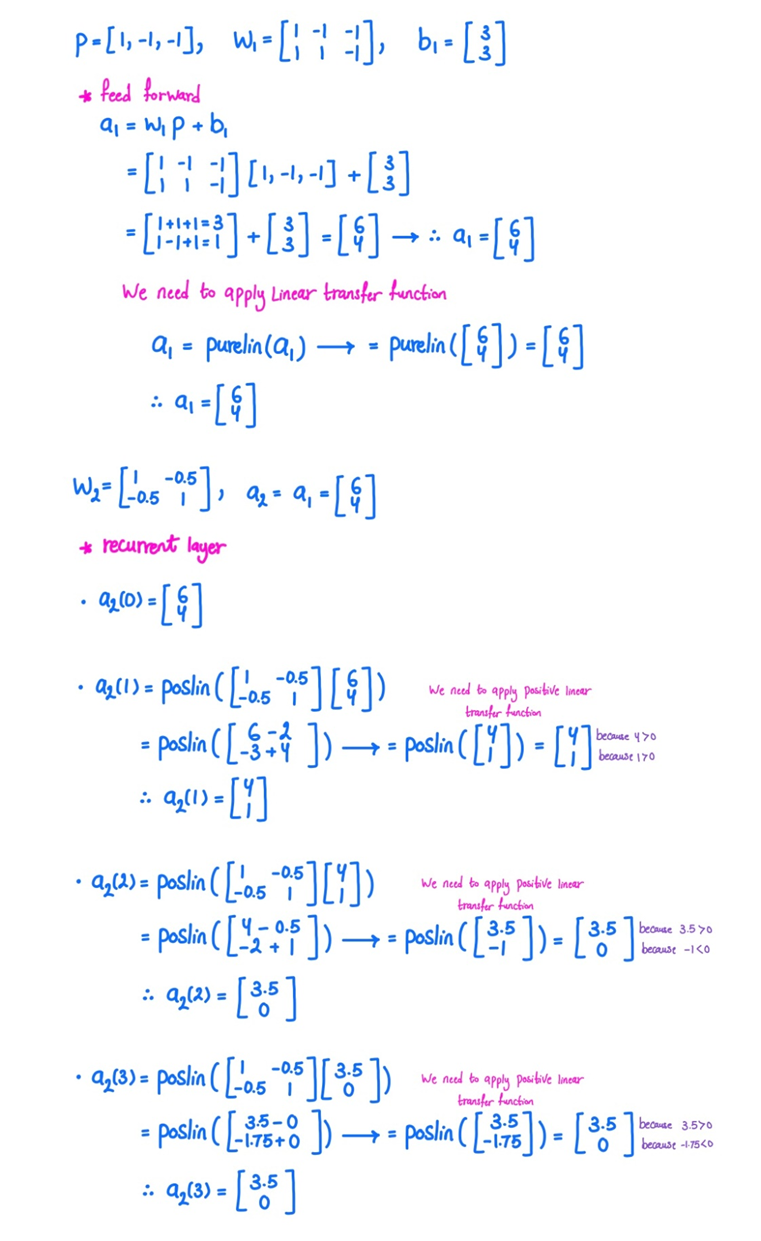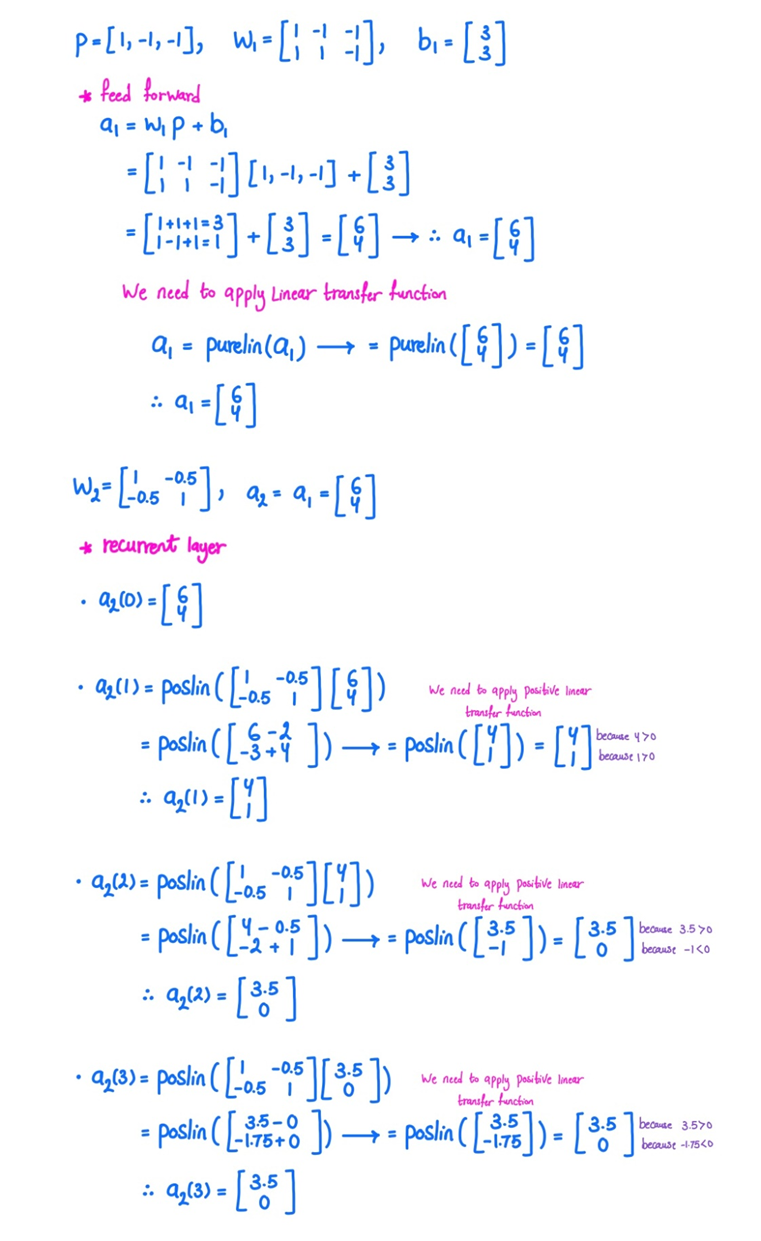